                days_to_approval  days_to_disbursement  days_until_due
loan_type                                                             
Car Loan                    14.4                   6.9           102.4
Education Loan              14.4                   7.2           106.3
Home Loan                   14.6                   6.9           105.1
Personal Loan               14.1                   7.2           104.8


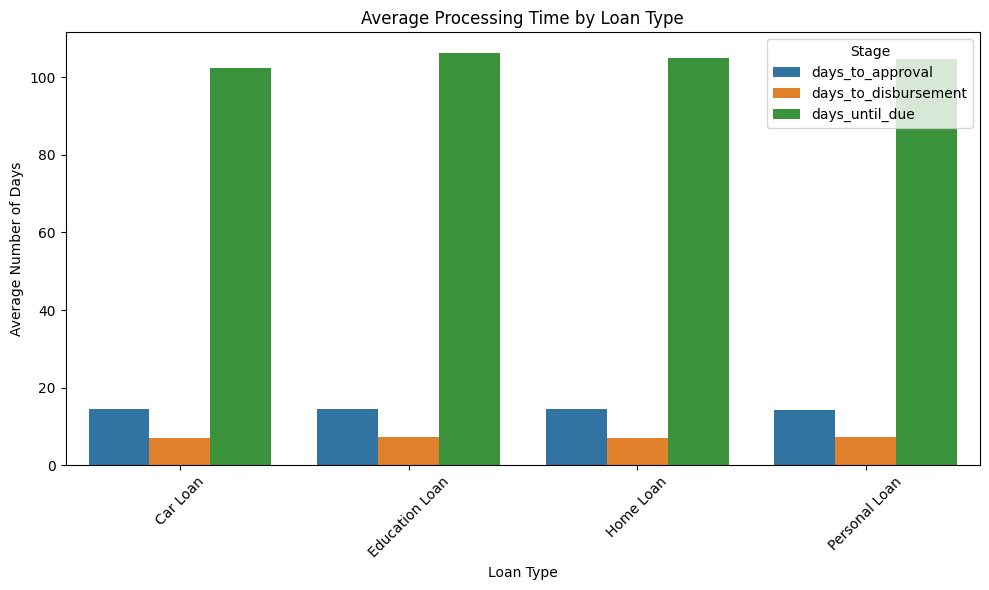

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (if not already loaded)
df = pd.read_csv(r'C:\Users\Eriigbagbo\Documents\Portfolio\cleaned_finances.csv', parse_dates=[
    'application_date', 'approval_date', 'disbursement_date', 'due_date'
])

# Ensure dates are clean datetime
date_cols = ['application_date', 'approval_date', 'disbursement_date', 'due_date']
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

# STEP 1: Create duration columns
df['days_to_approval'] = (df['approval_date'] - df['application_date']).dt.days
df['days_to_disbursement'] = (df['disbursement_date'] - df['approval_date']).dt.days
df['days_until_due'] = (df['due_date'] - df['disbursement_date']).dt.days

# STEP 2: Group by loan_type and calculate averages
grouped = df.groupby('loan_type')[['days_to_approval', 'days_to_disbursement', 'days_until_due']].mean().round(1)

# Print summary table
print(grouped)

# STEP 3: Plotting the values
grouped_plot = grouped.reset_index().melt(id_vars='loan_type', var_name='Duration Type', value_name='Days')

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_plot, x='loan_type', y='Days', hue='Duration Type')
plt.title("Average Processing Time by Loan Type")
plt.xlabel("Loan Type")
plt.ylabel("Average Number of Days")
plt.xticks(rotation=45)
plt.legend(title="Stage")
plt.tight_layout()
plt.savefig(r"C:\Users\Eriigbagbo\Documents\Portfolio\Pictures\spread_in_bias.png", dpi=300, bbox_inches='tight')
plt.show()

   employment_type       loan_type  count  percentage
0        Full-time        Car Loan    422       25.44
1        Full-time  Education Loan    413       24.89
2        Full-time       Home Loan    416       25.08
3        Full-time   Personal Loan    408       24.59
4        Part-time        Car Loan    448       26.79
5        Part-time  Education Loan    363       21.71
6        Part-time       Home Loan    433       25.90
7        Part-time   Personal Loan    428       25.60
8    Self-employed        Car Loan    403       24.15
9    Self-employed  Education Loan    406       24.33
10   Self-employed       Home Loan    415       24.87
11   Self-employed   Personal Loan    445       26.66


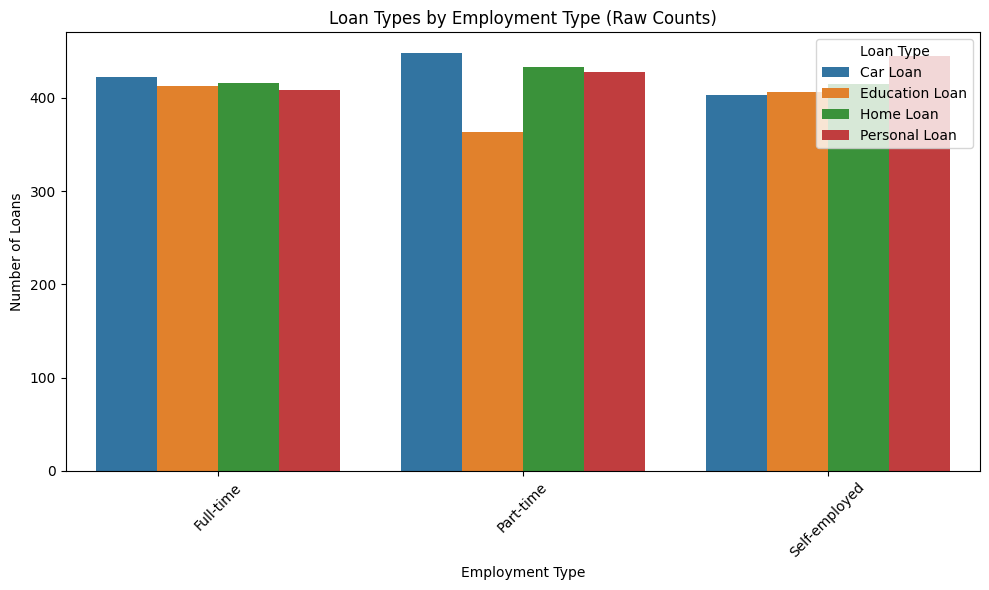

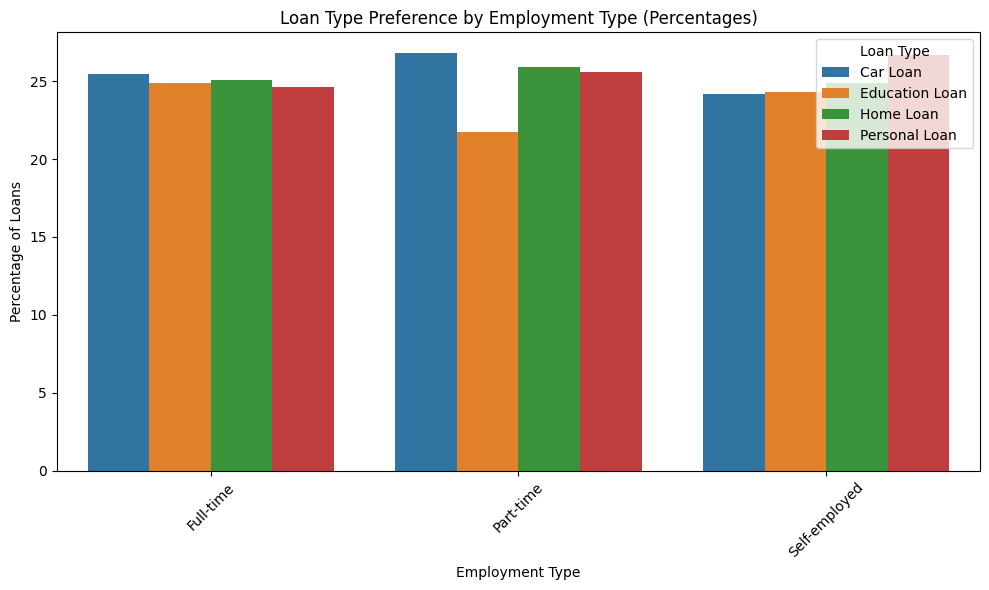

In [2]:
# Count of loans per employment type and loan type
loan_counts = df.groupby(['employment_type', 'loan_type']).size().reset_index(name='count')

# Percentage distribution (row-wise within employment type)
total_per_emp_type = loan_counts.groupby('employment_type')['count'].transform('sum')
loan_counts['percentage'] = (loan_counts['count'] / total_per_emp_type * 100).round(2)

# Show top of the data
print(loan_counts.head(20))

plt.figure(figsize=(10, 6))
sns.barplot(data=loan_counts, x='employment_type', y='count', hue='loan_type')
plt.title("Loan Types by Employment Type (Raw Counts)")
plt.ylabel("Number of Loans")
plt.xlabel("Employment Type")
plt.xticks(rotation=45)
plt.legend(title="Loan Type")
plt.tight_layout()
plt.savefig(r"C:\Users\Eriigbagbo\Documents\Portfolio\Pictures\spread_in_employment_type.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=loan_counts, x='employment_type', y='percentage', hue='loan_type')
plt.title("Loan Type Preference by Employment Type (Percentages)")
plt.ylabel("Percentage of Loans")
plt.xlabel("Employment Type")
plt.xticks(rotation=45)
plt.legend(title="Loan Type")
plt.tight_layout()
plt.savefig(r"C:\Users\Eriigbagbo\Documents\Portfolio\Pictures\spread_in_preferences.png", dpi=300, bbox_inches='tight')
plt.show()

   marital_status       loan_type  count  percentage
0        Divorced        Car Loan    419       24.91
1        Divorced  Education Loan    395       23.48
2        Divorced       Home Loan    444       26.40
3        Divorced   Personal Loan    424       25.21
4         Married        Car Loan    433       25.76
5         Married  Education Loan    400       23.80
6         Married       Home Loan    406       24.15
7         Married   Personal Loan    442       26.29
8          Single        Car Loan    421       25.72
9          Single  Education Loan    387       23.64
10         Single       Home Loan    414       25.29
11         Single   Personal Loan    415       25.35


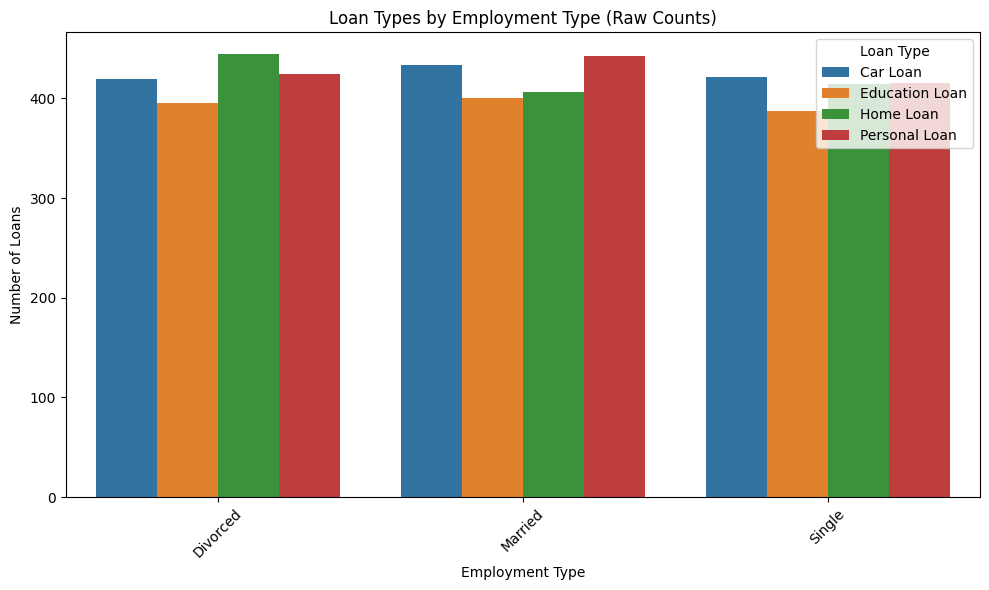

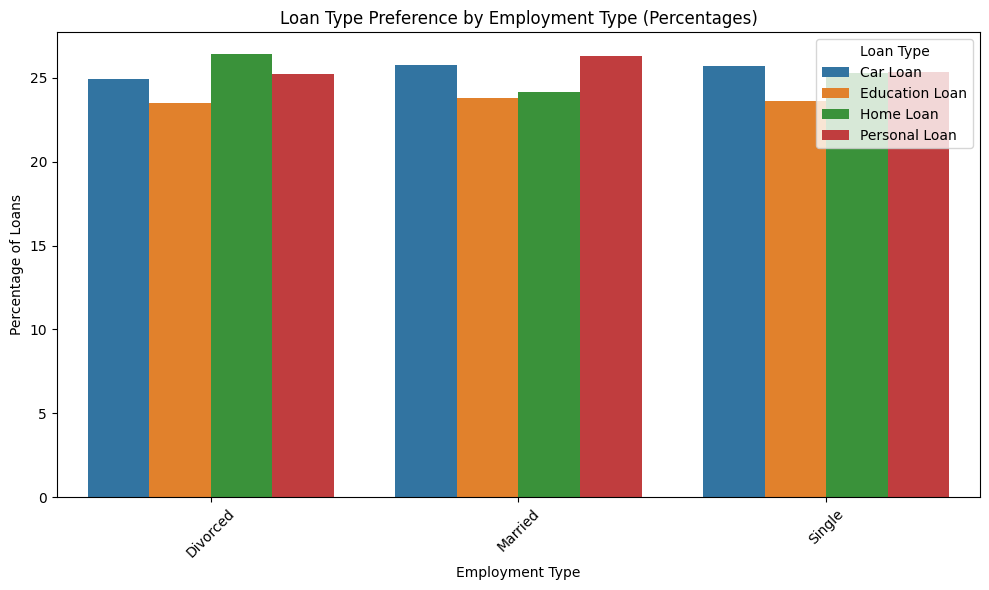

In [4]:
# Count of loans per marital status and loan type
loan_counts = df.groupby(['marital_status', 'loan_type']).size().reset_index(name='count')

# Percentage distribution (row-wise within marital status)
total_per_emp_type = loan_counts.groupby('marital_status')['count'].transform('sum')
loan_counts['percentage'] = (loan_counts['count'] / total_per_emp_type * 100).round(2)

# Show top of the data
print(loan_counts.head(20))

plt.figure(figsize=(10, 6))
sns.barplot(data=loan_counts, x='marital_status', y='count', hue='loan_type')
plt.title("Loan Types by Employment Type (Raw Counts)")
plt.ylabel("Number of Loans")
plt.xlabel("Employment Type")
plt.xticks(rotation=45)
plt.legend(title="Loan Type")
plt.tight_layout()
plt.savefig(r"C:\Users\Eriigbagbo\Documents\Portfolio\Pictures\spread_in_marital_status.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=loan_counts, x='marital_status', y='percentage', hue='loan_type')
plt.title("Loan Type Preference by Employment Type (Percentages)")
plt.ylabel("Percentage of Loans")
plt.xlabel("Employment Type")
plt.xticks(rotation=45)
plt.legend(title="Loan Type")
plt.tight_layout()
plt.savefig(r"C:\Users\Eriigbagbo\Documents\Portfolio\Pictures\spread_in_preferences_mar.png", dpi=300, bbox_inches='tight')
plt.show()